In [2]:
import pandas as pd
from scipy import stats
import numpy as np

#Load the dataset
df = pd.read_csv('../data/ecommerce_data.csv')

#Preview data
df.head()


,user_id,group,purchase,revenue,session_duration,device_type
0,1,control,0,0.00,209,mobile
1,2,treatment,0,0.00,890,desktop
2,3,control,0,0.00,90,mobile
3,4,control,1,51.23,176,desktop
4,5,control,0,0.00,593,mobile


# Chi-Square Test for Conversion Rate(Categorical)
The reason for this test is to find out whether the conversion rate is significantly different between control and treatment.
We use chi-square test of independence to see if group assignment is associated with conversion outcome.

In [3]:
#Create a contingency table
conversion_table = pd.crosstab(df['group'], df['purchase'])

#Run Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(conversion_table)

#Show result
print("Chi-Square Statistic:", round(chi2, 3))
print("p-value:", round(p, 4))

Chi-Square Statistic: 2.692
p-value: 0.1009


# Chi-Square Test Interpretation
The p-value tells us whether the probability of the observed difference in conversion rates happened by chance.
If p-value < 0.05 the difference is statistically significant and if p-value > 0.05 the difference is not statistically significant.

The p-value from the Chi-Square test is 0.1009 which is above the significance threshold of 0.05.This means we fail to reject the null hypothesis as there is no strong statistical evidence that the conversion rates between the control and treatment groups are significantly different.

# T-Test for Revenue (Numerical)
The reason for the test is to find out whether the average revenue per user is significantly different between control and treatment.
Independent t-test is used because revenue is continuous and the groups are independent.


In [4]:
#Group revenues
control_revenue = df[df['group'] == 'control']['revenue']
treatment_revenue = df[df['group'] == 'treatment']['revenue']

#Perfom independent t-test
t_stat, p_value = stats.ttest_ind(treatment_revenue, control_revenue)

#Show results
print("T-Statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

T-Statistic: 1.492
p-value: 0.1357


# T-Test Interpretation (Revenue)
The t-test returned a p-value of 0.1357 which is greater than 0.05. This means that the observed difference in average revenue per user between the treatment and control group is not statistically significant. 

Due to this, we cannot confidently claim that the new treatment drives more revenue based on this test alone the difference could be due to chance.

# Confidence Interval for Conversion Rate

In [5]:
def propotion_confint(successes, n, confidence=0.95):
    p_hat = successes / n
    z = stats.norm.ppf(1 - (1 - confidence)/2)
    margin = z * np.sqrt((p_hat * (1 - p_hat)) / n)
    return round(p_hat - margin, 4), round(p_hat + margin, 4)

#Control group
control = df[df['group'] == 'control']
control_conv = control['purchase'].sum()
control_n = control.shape[0]

#Treatment group
treatment = df[df['group'] == 'treatment']
treatment_conv = treatment['purchase'].sum()
treatment_n = treatment.shape[0]

#Compute CIs
control_ci = propotion_confint(control_conv, control_n)
treatment_ci = propotion_confint(treatment_conv, treatment_n)

print("Control group 95% CI:", control_ci)
print("Treatment group 95% CI:", treatment_ci)

Control group 95% CI: (np.float64(0.1094), np.float64(0.135))
Treatment group 95% CI: (np.float64(0.1247), np.float64(0.1518))


# Confidence Interval  Interpretation
The confidence interval tells us the likely range of the true conversion rate for each group. If the intervals do not overlap it is a strong sign that the groups are different but if the intervals overlap the difference may not be statistically meaningful.
This helps visualize the uncertainity around our estimates.

From the above results the 95% confidence interval for control group is (10.94%, 13.50%) while the 95% confidence interval for the treatment group is (12.47%, 15.18%).

There is an overlap between the two intervals which suggest that the true difference in conversion rates may not be statistically significant. The treatment maybe better but there is uncertainity as to whether it outperfoms control - it could be due to random variation.

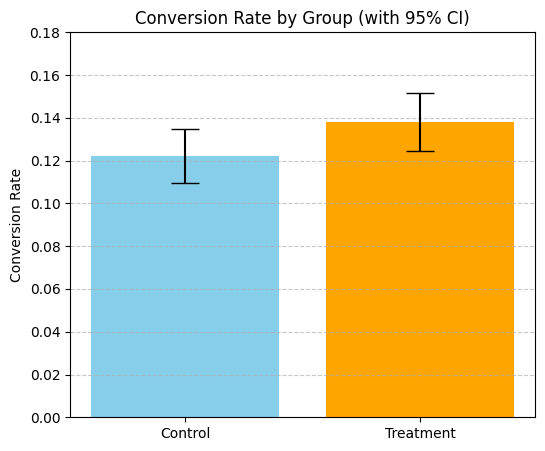

In [ ]:
# Visualization of the Conversion Rates with Confidence Intervals
import matplotlib.pyplot as plt

#Conversion rates (point estimates)
control_rate = control_conv / control_n
treatment_rate = treatment_conv / treatment_n

#Error bars (margin of error)
control_err = control_ci[1] - control_rate
treatment_err = treatment_ci[1] - treatment_rate

#Plot
plt.figure(figsize=(6, 5))
plt.bar(['Control', 'Treatment'], [control_rate, treatment_rate], yerr=[control_err, treatment_err], capsize=10, color=['skyblue', 'orange'])

plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group (with 95% CI)')
plt.ylim(0, 0.18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(r"C:\Users\Getrude\Desktop\ecommerce-ab-test\images\conversion_rate", dpi=300, bbox_inches="tight")
plt.show()




# Boxplot of Revenue Distribution by Group.

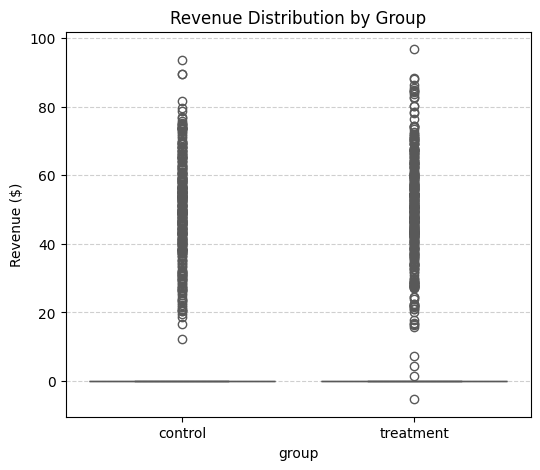

In [14]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x='group', y='revenue', hue='group', data=df, palette='Set2', legend=False)
plt.title("Revenue Distribution by Group")
plt.ylabel("Revenue ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(r"C:\Users\Getrude\Desktop\ecommerce-ab-test\images\revenue_distribution", dpi=300, bbox_inches="tight")
plt.show()

# Revenue Distribution interpretation
The boxplot shows that the majority of users in both control and treatment groups have $0 revenue which reflects the low conversion rates typical in e-commerce.

Outliers represents the users who did convert and made purchases.These users appear similarly distributed across both groups.

The visual reinforces the earlier statistical result where the treatment group had a higher average revenue and the difference was not statistically significant. Most users did not convert and the revenue patterns are fairly consistent between the two groups.